In [73]:
import pandas as pd
import numpy as np

In [74]:
data_wig20 = pd.read_csv("data/wig20_2005.csv")
data_peo = pd.read_csv("data/peo_2005.csv")

In [75]:
data_peo

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2005-01-03,56.8084,58.8612,56.8084,58.2476,376792.311012
1,2005-01-04,57.4235,58.0435,57.2176,57.8319,159300.776621
2,2005-01-05,57.2176,57.6333,55.7800,55.7800,429800.893829
3,2005-01-06,55.5742,56.8084,55.1601,55.1601,377216.003060
4,2005-01-07,55.1601,56.1893,54.9551,55.1601,273211.994084
...,...,...,...,...,...,...
4749,2023-12-21,133.7320,137.0570,133.5970,136.0230,572836.788713
4750,2023-12-22,134.8100,136.4280,133.9110,136.0680,215812.422528
4751,2023-12-27,135.8890,138.1350,135.6640,137.7310,461460.140829
4752,2023-12-28,138.2250,138.4050,136.7420,137.3270,264670.028160


In [76]:
data_peo['Zwrot'] = data_peo['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [77]:
window_length = 30

In [78]:
rolling_betas = [np.nan] * window_length 

In [79]:
for end_index in range(window_length, len(data_peo)):
    window_data_peo = data_peo.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    avg_return_market = window_data_wig20['Zwrot'].mean()
    avg_return_asset = window_data_peo['Zwrot'].mean()

    sum_numerator = ((window_data_peo['Zwrot'] - avg_return_asset) * (window_data_wig20['Zwrot'] - avg_return_market)).sum()
    sum_denominator = ((window_data_wig20['Zwrot'] - avg_return_market) ** 2).sum()

    beta = sum_numerator / sum_denominator if sum_denominator != 0 else np.nan
    rolling_betas.append(beta)

In [80]:
rolling_betas = rolling_betas[:len(data_peo)]

In [81]:
data_peo['Beta'] = rolling_betas

In [82]:
data_peo

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Zwrot,Beta
0,2005-01-03,56.8084,58.8612,56.8084,58.2476,376792.311012,NaN,NaN
1,2005-01-04,57.4235,58.0435,57.2176,57.8319,159300.776621,-0.007137,NaN
2,2005-01-05,57.2176,57.6333,55.7800,55.7800,429800.893829,-0.035480,NaN
3,2005-01-06,55.5742,56.8084,55.1601,55.1601,377216.003060,-0.011113,NaN
4,2005-01-07,55.1601,56.1893,54.9551,55.1601,273211.994084,0.000000,NaN
...,...,...,...,...,...,...,...,...
4749,2023-12-21,133.7320,137.0570,133.5970,136.0230,572836.788713,0.012370,1.229294
4750,2023-12-22,134.8100,136.4280,133.9110,136.0680,215812.422528,0.000331,1.170057
4751,2023-12-27,135.8890,138.1350,135.6640,137.7310,461460.140829,0.012222,1.186313
4752,2023-12-28,138.2250,138.4050,136.7420,137.3270,264670.028160,-0.002933,1.192157


In [83]:
data_peo.to_csv("data/peo_2005_beta.csv", index=False)

In [84]:
start_date = data_peo.index[30]

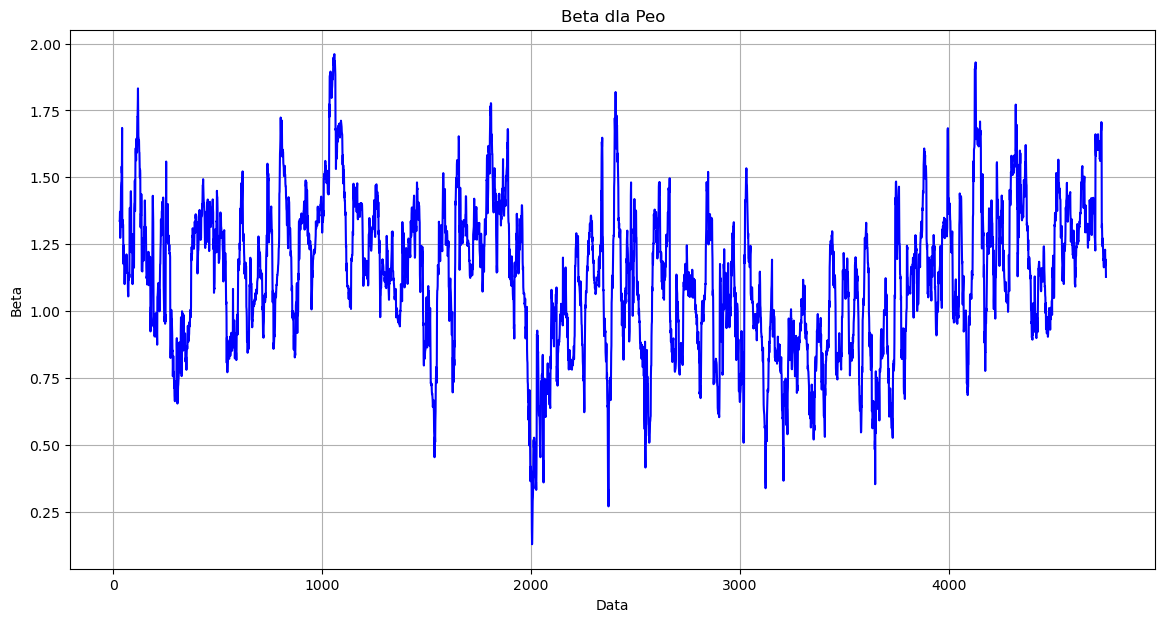

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, data_peo.loc[start_date:]['Beta'], color='blue')
plt.title('Beta dla Peo')
plt.xlabel('Data')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

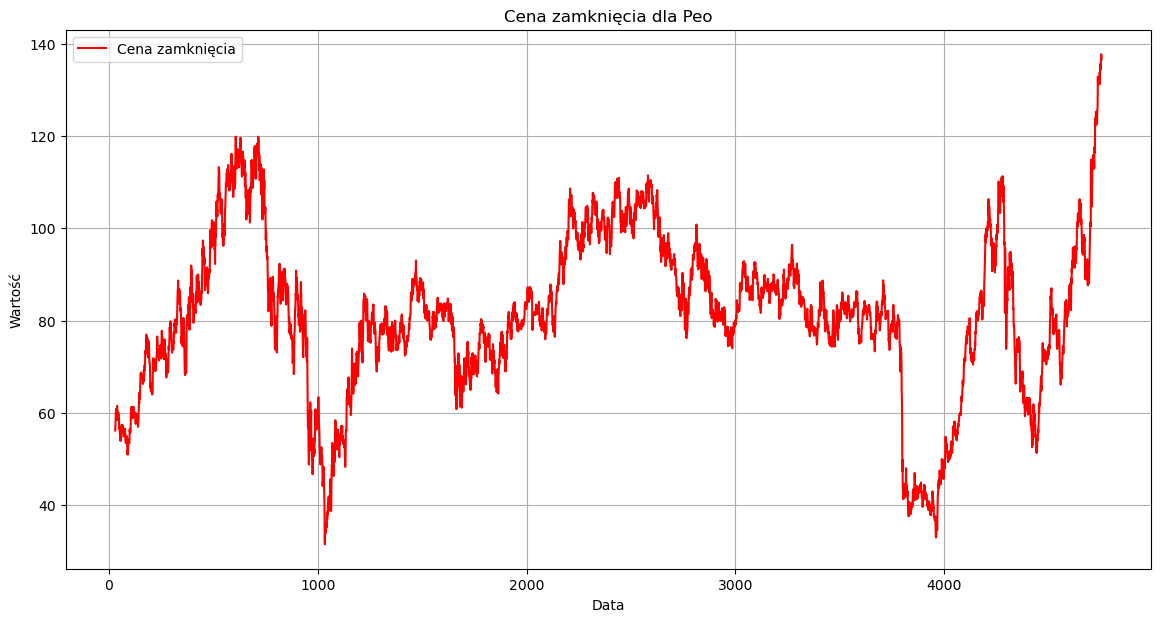

In [86]:
start_date = data_peo.index[30]

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, data_peo.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla Peo')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

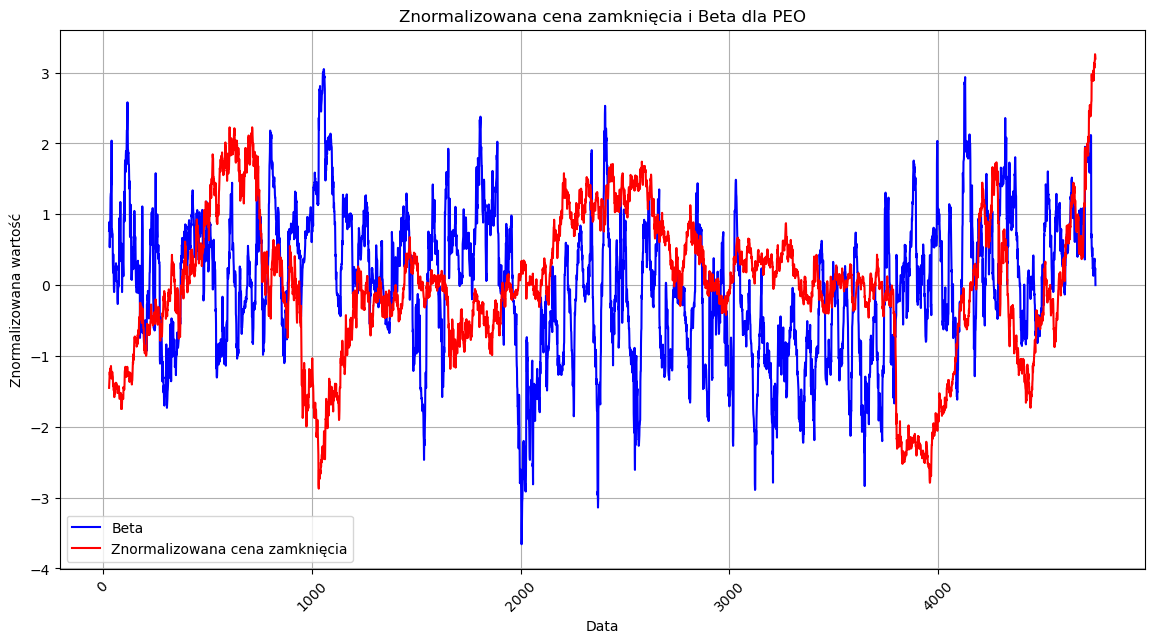

In [87]:
start_date = data_peo.index[30]

normalized_rolling_beta = (data_peo.loc[start_date:]['Beta'] - data_peo.loc[start_date:]['Beta'].mean()) / data_peo.loc[start_date:]['Beta'].std()
normalized_closing_price = (data_peo.loc[start_date:]['Zamkniecie'] - data_peo.loc[start_date:]['Zamkniecie'].mean()) / data_peo.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Beta')
plt.plot(data_peo.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Beta dla PEO')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()